In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [286]:
df = pd.read_csv("Automobile_data.csv")

In [287]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [288]:
df.shape

(205, 26)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [290]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [326]:
for column in df.columns:
    print(f"Değerler ve Sayılar için: {column}")
    print(df[column].value_counts())
    print("\n" + "="*50 + "\n")
    

Değerler ve Sayılar için: normalized-losses
122.0    41
161      11
91        8
150       7
134       6
128       6
104       6
85        5
94        5
65        5
102       5
74        5
168       5
103       5
95        5
106       4
93        4
118       4
148       4
122       4
83        3
125       3
154       3
115       3
137       3
101       3
119       2
87        2
89        2
192       2
197       2
158       2
81        2
188       2
194       2
153       2
129       2
108       2
110       2
164       2
145       2
113       2
256       1
107       1
90        1
231       1
142       1
121       1
78        1
98        1
186       1
77        1
Name: normalized-losses, dtype: int64


Değerler ve Sayılar için: make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
p

In [292]:
# Verinin temizlenmesi ve düzenlenmesi

df.rename(columns= { 'fuel-type': "yakıt_tipi",
                     'num-of-doors': "kapı_sayısı",
                     'horsepower': "beygir_gücü",
                   }, inplace=True)

In [293]:
df.drop(columns=["symboling", "highway-mpg", "wheel-base"], axis=1, inplace=True)

In [294]:
# Eksik verilerin saptanması

df = df.replace(to_replace = '?', value= np.nan)


In [295]:
df.head(2)

,normalized-losses,make,yakıt_tipi,aspiration,kapı_sayısı,body-style,drive-wheels,engine-location,length,width,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,beygir_gücü,peak-rpm,city-mpg,price
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500


In [296]:
df.isnull().sum()

normalized-losses    41
make                  0
yakıt_tipi            0
aspiration            0
kapı_sayısı           2
body-style            0
drive-wheels          0
engine-location       0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
beygir_gücü           2
peak-rpm              2
city-mpg              0
price                 4
dtype: int64

In [297]:
# Eksik değerlerin doldurulması

df['normalized-losses'].fillna(df['normalized-losses'].astype("float").mean(), inplace=True)

In [298]:
# object tipteki değişkenlerin en çok tekrar edenlerle doldurma

fill_col = ["kapı_sayısı", "bore", "stroke", "beygir_gücü", "peak-rpm", "price"]

for col in fill_col:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [299]:
# Filtreleme İşlemleri

df["price"] = pd.to_numeric(df["price"], errors='coerce')
df_filtered = df.query("price > 15000 and yakıt_tipi == 'gas'").head()
df_filtered

,normalized-losses,make,yakıt_tipi,aspiration,kapı_sayısı,body-style,drive-wheels,engine-location,length,width,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,beygir_gücü,peak-rpm,city-mpg,price
1,122.0,alfa-romero,gas,std,two,convertible,rwd,front,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500
2,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,171.2,65.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500
4,164,audi,gas,std,four,sedan,4wd,front,176.6,66.4,...,five,136,mpfi,3.19,3.4,8.0,115,5500,18,17450
5,122.0,audi,gas,std,two,sedan,fwd,front,177.3,66.3,...,five,136,mpfi,3.19,3.4,8.5,110,5500,19,15250
6,158,audi,gas,std,four,sedan,fwd,front,192.7,71.4,...,five,136,mpfi,3.19,3.4,8.5,110,5500,19,17710


In [300]:
df.query("`body-style` in ['sedan', 'hatchback']").head()

,normalized-losses,make,yakıt_tipi,aspiration,kapı_sayısı,body-style,drive-wheels,engine-location,length,width,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,beygir_gücü,peak-rpm,city-mpg,price
2,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,171.2,65.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500
3,164,audi,gas,std,four,sedan,fwd,front,176.6,66.2,...,four,109,mpfi,3.19,3.4,10.0,102,5500,24,13950
4,164,audi,gas,std,four,sedan,4wd,front,176.6,66.4,...,five,136,mpfi,3.19,3.4,8.0,115,5500,18,17450
5,122.0,audi,gas,std,two,sedan,fwd,front,177.3,66.3,...,five,136,mpfi,3.19,3.4,8.5,110,5500,19,15250
6,158,audi,gas,std,four,sedan,fwd,front,192.7,71.4,...,five,136,mpfi,3.19,3.4,8.5,110,5500,19,17710


In [301]:
# beygir_gücü 110'dan büyük olan aracın "make", "yakıt_tipi", "kapı_sayısı" bilgilerini getirsin, yakıt_tipi ne göre azalan sırada sıralasın


df["beygir_gücü"] = pd.to_numeric(df["beygir_gücü"], errors='coerce')

df[df["beygir_gücü"] > 110][["make", "yakıt_tipi", "kapı_sayısı"]].sort_values(by="yakıt_tipi", ascending=False)

,make,yakıt_tipi,kapı_sayısı
0,alfa-romero,gas,two
1,alfa-romero,gas,two
167,toyota,gas,two
166,toyota,gas,two
165,toyota,gas,two
...,...,...,...
71,mercedes-benz,gas,four
68,mercedes-benz,diesel,four
70,mercedes-benz,diesel,four
69,mercedes-benz,diesel,two


In [302]:
# engine-size'ı 136-140 arasındaki aracın "engine-location", "engine-size", "fuel-system" bilgilerini getirelim

df[df["engine-size"].between(136, 140)][["engine-location", "engine-size", "fuel-system"]]

,engine-location,engine-size,fuel-system
4,front,136,mpfi
5,front,136,mpfi
6,front,136,mpfi
7,front,136,mpfi
65,front,140,mpfi
75,front,140,mpfi
191,front,136,mpfi


In [303]:
# Gruplama İşlemleri

grouped_df = df.groupby('kapı_sayısı').agg({'price': ['mean', 'max', 'min']})
grouped_df

price             
                     mean    max   min
kapı_sayısı                           
four         13498.043103  40960  6229
two          12841.078652  45400  5118

In [304]:
# 2. Standartlaştırma ve Normalizasyon

scaler = StandardScaler()
df['city-mpg_Standardized'] = scaler.fit_transform(df[['city-mpg']])

df['city-mpg_Standardized']

0     -0.646553
1     -0.646553
2     -0.953012
3     -0.186865
4     -1.106241
         ...   
200   -0.340094
201   -0.953012
202   -1.106241
203    0.119594
204   -0.953012
Name: city-mpg_Standardized, Length: 205, dtype: float64

In [305]:
# normalizasyon

normalizer = MinMaxScaler()

df['length_Normalized'] = normalizer.fit_transform(df[['length']])
df['width_Normalized'] = normalizer.fit_transform(df[['width']])
df['height_Normalized'] = normalizer.fit_transform(df[['height']])


print(df[['length_Normalized', 'width_Normalized', 'height_Normalized']])


     length_Normalized  width_Normalized  height_Normalized
0             0.413433          0.316667           0.083333
1             0.413433          0.316667           0.083333
2             0.449254          0.433333           0.383333
3             0.529851          0.491667           0.541667
4             0.529851          0.508333           0.541667
..                 ...               ...                ...
200           0.711940          0.716667           0.641667
201           0.711940          0.708333           0.641667
202           0.711940          0.716667           0.641667
203           0.711940          0.716667           0.641667
204           0.711940          0.716667           0.641667

[205 rows x 3 columns]


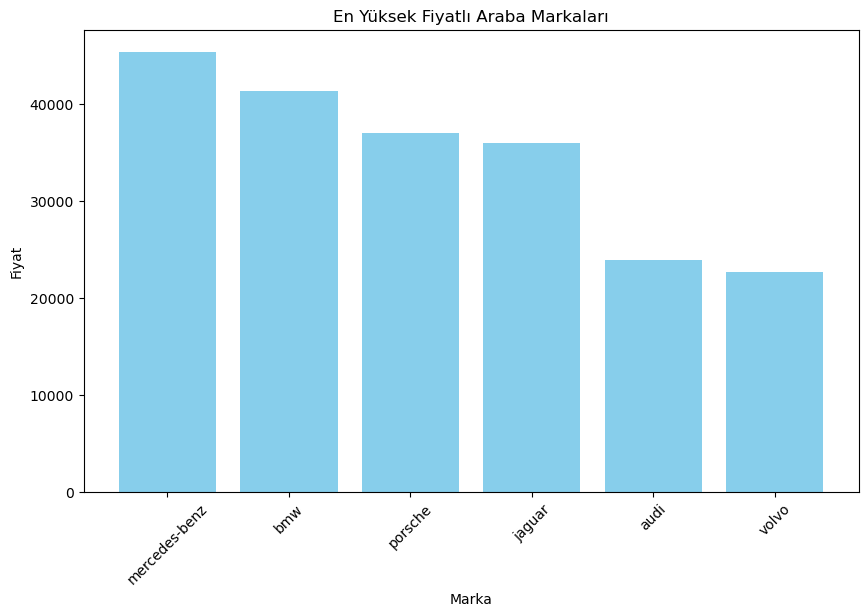

In [315]:
# Fiyatı en yüksek ilk 20 arabayı seçme ve görselleştirme

top_cars = df.nlargest(20, 'price')

# Markaların görselleştirilmesi
plt.figure(figsize=(10, 6))
plt.bar(top_cars['make'], top_cars['price'], color='skyblue')
plt.xlabel('Marka')
plt.ylabel('Fiyat')
plt.title('En Yüksek Fiyatlı Araba Markaları')
plt.xticks(rotation=45)
plt.show()

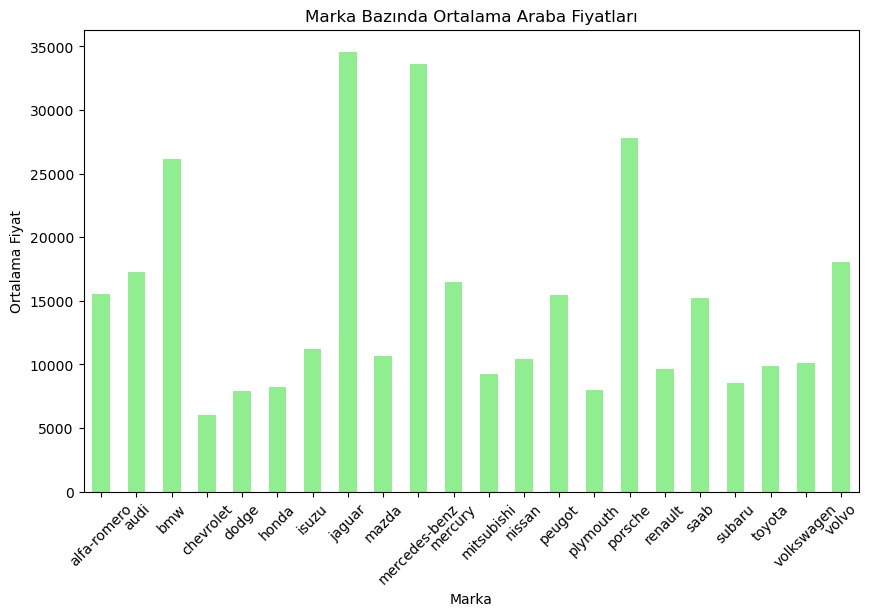

In [316]:
# Her marka için ortalama fiyat
average_prices = df.groupby('make')['price'].mean()

# Çubuk grafiği
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color='lightgreen')
plt.xlabel('Marka')
plt.ylabel('Ortalama Fiyat')
plt.title('Marka Bazında Ortalama Araba Fiyatları')
plt.xticks(rotation=45)
plt.show()

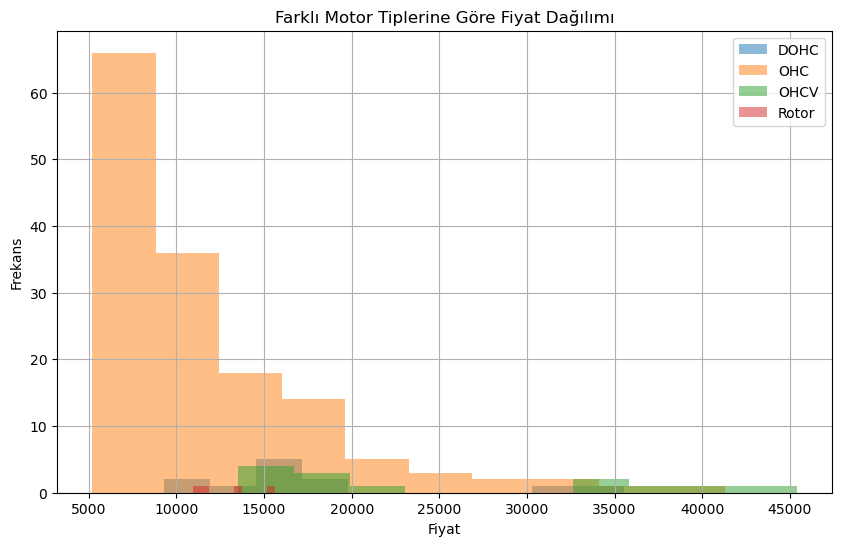

In [317]:
# Motor tipine göre fiyat dağılımını histogram ile görselleştirelim
plt.figure(figsize=(10, 6))
df[df['engine-type'] == 'dohc']['price'].hist(alpha=0.5, label='DOHC', bins=10)
df[df['engine-type'] == 'ohc']['price'].hist(alpha=0.5, label='OHC', bins=10)
df[df['engine-type'] == 'ohcv']['price'].hist(alpha=0.5, label='OHCV', bins=10)
df[df['engine-type'] == 'rotor']['price'].hist(alpha=0.5, label='Rotor', bins=10)

plt.xlabel('Fiyat')
plt.ylabel('Frekans')
plt.title('Farklı Motor Tiplerine Göre Fiyat Dağılımı')
plt.legend()
plt.show()

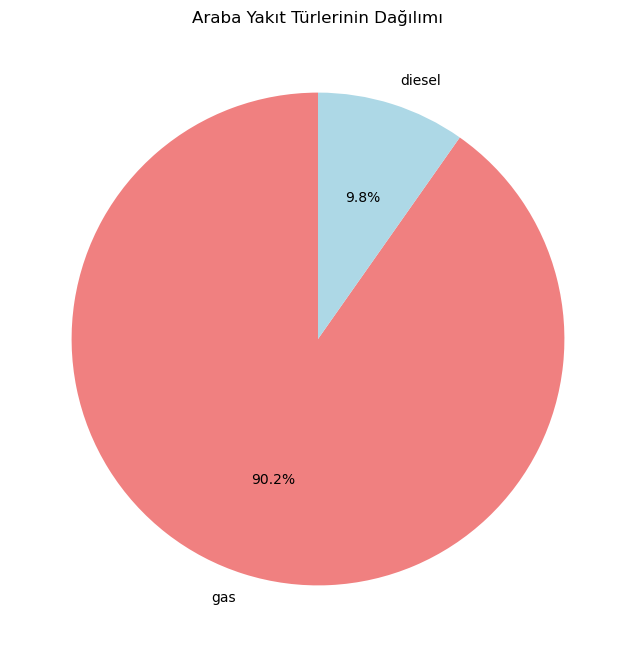

In [319]:
# Yakıt türlerinin oranlarını pasta grafiği ile gösterelim

fuel_type_counts = df['yakıt_tipi'].value_counts()

plt.figure(figsize=(8, 8))
fuel_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Araba Yakıt Türlerinin Dağılımı')
plt.ylabel('')  # Y eksenini gizle
plt.show()